In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('sender.csv')
df_new = pd.read_csv('sender_new.csv')

In [3]:
df.head()

,Unnamed: 0,label,date,sender,subject,summary
0,0,CATEGORY_PROMOTIONS,"Sat, 9 Jul 2022 11:39:34 +0000",Netflix <info@mailer.netflix.com>,"Lukas, we just added a TV show you might like","After his father is killed, young Thorfinn joi..."
1,1,CATEGORY_UPDATES,"Sat, 09 Jul 2022 11:07:25 +0000",Chandler <chandler@marchmanstrength.com>,Boost T and build the body you want,Hot chocolate recipe boosts testosterone and c...
2,2,CATEGORY_UPDATES,"Sat, 9 Jul 2022 09:59:47 +0000",Rocka Nutrition <info@rockanutrition.de>,☀️OUT NOW: Summer Limiteds☀️,Unsere 6 exklusiven Summer Flavors sind ab sof...
3,3,CATEGORY_UPDATES,"Sat, 09 Jul 2022 05:55:20 -0400",Nathan Chan - Foundr <support@foundr.com>,Access every Foundr course for a year,This email was sent to lukas.forst48@googlemai...
4,4,CATEGORY_PROMOTIONS,"Sat, 09 Jul 2022 03:12:37 -0600",adidas <adidas@de-news.adidas.com>,Mehr Inclusivity mit adicolor,Adicolor ist mit einer gender-free Kollektion ...


In [4]:
len(df), len(df_new)

(87, 279)

In [5]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x, utc=True))
df_new['date'] = df_new['date'].apply(lambda x: pd.to_datetime(x, utc=True))


In [6]:
df.drop("Unnamed: 0",inplace=True, axis=1)
df_new.drop("Unnamed: 0",inplace=True, axis=1)

D:\Anaconda3\envs\pyproject\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


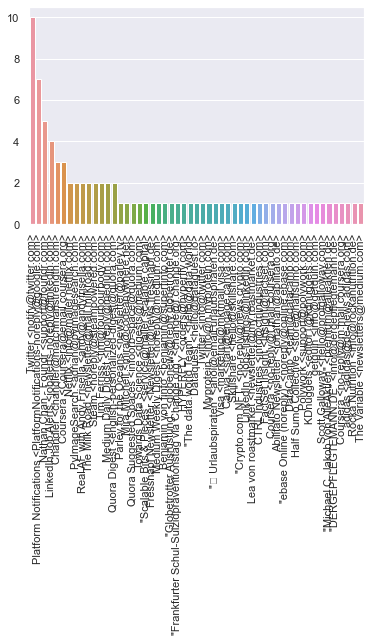

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.barplot(x=df.sender.value_counts().index, y=df.sender.value_counts().values)
plot.tick_params(axis='x', rotation=90)

D:\Anaconda3\envs\pyproject\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\envs\pyproject\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128075 (\N{WAVING HAND SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


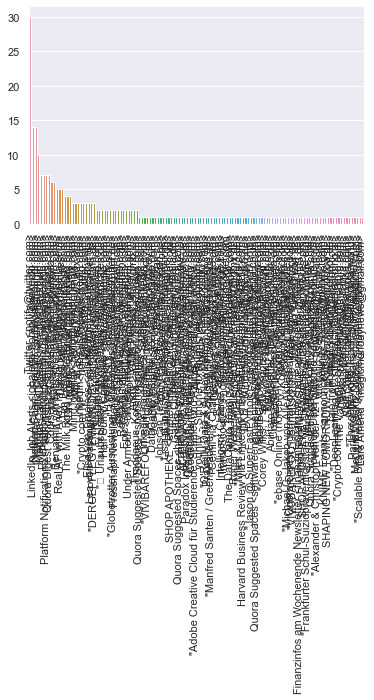

In [8]:
plot = sns.barplot(x=df_new.sender.value_counts().index, y=df_new.sender.value_counts().values)
plot.tick_params(axis='x', rotation=90)

In [9]:
df_new.sender.value_counts()

Twitter <notify@twitter.com>                                  30
LinkedIn Job Alerts <jobalerts-noreply@linkedin.com>          14
Nathan Chan - Foundr <support@foundr.com>                     14
Chandler <chandler@marchmanstrength.com>                      10
Medium Daily Digest <noreply@medium.com>                       7
                                                              ..
"The data.world Team" <hello@data.world>                       1
Parley for the Oceans <newsletter@parley.tv>                   1
Medium Weekly Digest <noreply@medium.com>                      1
"Scalable Bits & Pieces" <service@mailer.scalable.capital>     1
Lars Amend <magicmondaynews@gmail.com>                         1
Name: sender, Length: 126, dtype: int64

In [10]:
df['date']

0    2022-07-09 11:39:34+00:00
1    2022-07-09 11:07:25+00:00
2    2022-07-09 09:59:47+00:00
3    2022-07-09 09:55:20+00:00
4    2022-07-09 09:12:37+00:00
                ...           
82   2022-07-07 14:21:32+00:00
83   2022-07-07 14:14:17+00:00
84   2022-07-07 14:14:17+00:00
85   2022-07-07 13:55:00+00:00
86   2022-07-07 13:50:25+00:00
Name: date, Length: 87, dtype: datetime64[ns, UTC]

In [11]:
df_new['day'] =df['date'].apply(lambda x: x.strftime("%d"))
df_new['day_name'] =df['date'].apply(lambda x: x.strftime("%a"))
df_new['month'] = df['date'].apply(lambda x: x.strftime("%m"))

In [12]:
df_new_d = df_new.groupby(by=['day','label']).count()
df_new_d = df_new_d.reset_index()

In [13]:
df_new.head()

,label,date,sender,subject,summary,day,day_name,month
0,CATEGORY_SOCIAL,2022-07-10 17:16:23+00:00,Twitter <notify@twitter.com>,"@Katanoro__, sieh dir die Mitteilungen an, die...",Jetzt ansehen diese E-Mail an @Katanoro__ gese...,09,Sat,07
1,CATEGORY_PROMOTIONS,2022-07-10 16:31:39+00:00,Skill Coach <coach@skill-yoga.com>,"Yoga for endurance athletes - poses, tips and ...","The longer and harder you train, the more you ...",09,Sat,07
2,CATEGORY_PROMOTIONS,2022-07-10 16:01:01+00:00,HYPERFLY <orders@hyperfly.com>,Check Out Our Summer Gi Restock 🔥,Get 25% off all core items now. Can't see this...,09,Sat,07
3,CATEGORY_PROMOTIONS,2022-07-10 16:00:14+00:00,"""Corey Wilks, Psy.D."" <corey@coreywilkspsyd.com>",Building Blocks: The dangers of measuring succ...,How much do you measure success by external vs...,09,Sat,07
4,CATEGORY_PROMOTIONS,2022-07-10 14:31:34+00:00,Quora Suggested Spaces <softwareengineeringexp...,Has scrum destroyed software quality? Everywhe...,Software engineering sales teams sometimes sel...,09,Sat,07


In [14]:
df_new['day'] = pd.to_numeric(df_new['day'])

In [25]:
df_new_d = df_new.groupby(by=['day','label']).count()
df_new_d = df_new_d.reset_index()

In [26]:
df_new_d = df_new_d[['day','label','sender','summary']]

In [18]:
#abc=test[test.index=='day']
#abc.plot(kind="bar")

In [19]:
#test = df_new_d.set_index('label').T
#test.plot(kind="bar",x="day")

<AxesSubplot:>

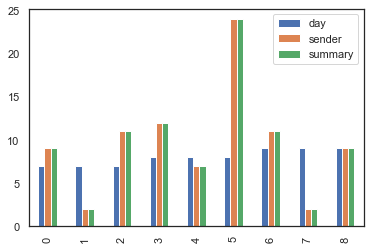

In [27]:
df_new_d.plot(kind='bar')

In [23]:
df_new_d

,day,label,summary
0,7.0,CATEGORY_PROMOTIONS,9
1,7.0,CATEGORY_SOCIAL,2
2,7.0,CATEGORY_UPDATES,11
3,8.0,CATEGORY_PROMOTIONS,12
4,8.0,CATEGORY_SOCIAL,7
5,8.0,CATEGORY_UPDATES,24
6,9.0,CATEGORY_PROMOTIONS,11
7,9.0,CATEGORY_SOCIAL,2
8,9.0,CATEGORY_UPDATES,9


In [40]:
df_new_d.day == 7.0

0     True
1     True
2     True
3    False
4    False
5    False
6    False
7    False
8    False
Name: day, dtype: bool

In [47]:
df_new_d[(df_new_d['label']=='CATEGORY_PROMOTIONS') & (df_new_d['day']==7.0)]['sender'].values[0]

9

In [30]:
df_prom =  df_new_d[df_new_d['sender']=='CATEGORY_PROMOTIONS']
df_social =  df_new_d[df_new_d['sender']=='CATEGORY_SOCIAL']
df_updates =  df_new_d[df_new_d['sender']=='CATEGORY_UPDATES']

In [57]:
import seaborn as sns
labels = ['CATEGORY_PROMOTIONS','CATEGORY_SOCIAL','CATEGORY_UPDATES']
datalist = []
for day in df_new.day.unique():
    if day > 0:
        value1 = df_new_d[(df_new_d['label']==labels[0]) & (df_new_d['day']==day)]['sender'].values[0]
        value2 = df_new_d[(df_new_d['label']==labels[1]) & (df_new_d['day']==day)]['sender'].values[0]
        value3 = df_new_d[(df_new_d['label']==labels[2]) & (df_new_d['day']==day)]['sender'].values[0]
        datalist.append([day,value1,value2,value3])

df_viz = pd.DataFrame(datalist, columns=['day','CATEGORY_PROMOTIONS','CATEGORY_SOCIAL','CATEGORY_UPDATES'])

In [58]:
df_viz

,day,CATEGORY_PROMOTIONS,CATEGORY_SOCIAL,CATEGORY_UPDATES
0,9.0,11,2,9
1,8.0,12,7,24
2,7.0,9,2,11


<AxesSubplot:title={'center':'Stacked Bar Graph by dataframe'}, xlabel='day'>

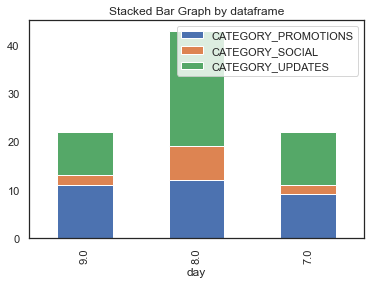

In [59]:
df_viz.plot(x='day', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')